In [1]:
!pip install -U hopsworks --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.2/170.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.3 MB/s eta 0:00:00
  Preparing metada

In [2]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import hopsworks
import pandas as pd

In [4]:
project = hopsworks.login()
fs = project.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/189588
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
wine_df['type'].replace(['white', 'red'],
                        [0, 1], inplace=True)

In [9]:
wine_df.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [10]:
# Raplace empty values with median
wine_df['fixed acidity'].fillna(wine_df['fixed acidity'].median(), inplace=True)
wine_df['volatile acidity'].fillna(wine_df['volatile acidity'].median(), inplace=True)
wine_df['citric acid'].fillna(wine_df['citric acid'].median(), inplace=True)
wine_df['residual sugar'].fillna(wine_df['residual sugar'].median(), inplace=True)
wine_df['chlorides'].fillna(wine_df['chlorides'].median(), inplace=True)
wine_df['pH'].fillna(wine_df['pH'].median(), inplace=True)
wine_df['sulphates'].fillna(wine_df['sulphates'].median(), inplace=True)

In [11]:
corr_matrix = wine_df.corr()

In [12]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085704
free sulfur dioxide     0.055463
sulphates               0.038770
pH                      0.019350
residual sugar         -0.036941
total sulfur dioxide   -0.041385
fixed acidity          -0.076931
type                   -0.119323
chlorides              -0.200742
volatile acidity       -0.265901
density                -0.305858
Name: quality, dtype: float64

In [ ]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Exploratory Data Analysis (EDA) our Wine Data

Let's look at our wine data - the distribution and range of values for the 4 different features

*   alcohol
*   chlorides
*   volatile acidity
*   density

and the target variable is `quality`.

In [13]:
clean_df = wine_df.drop(['citric acid', 'free sulfur dioxide', 'sulphates', 'pH', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'type'], axis=1)

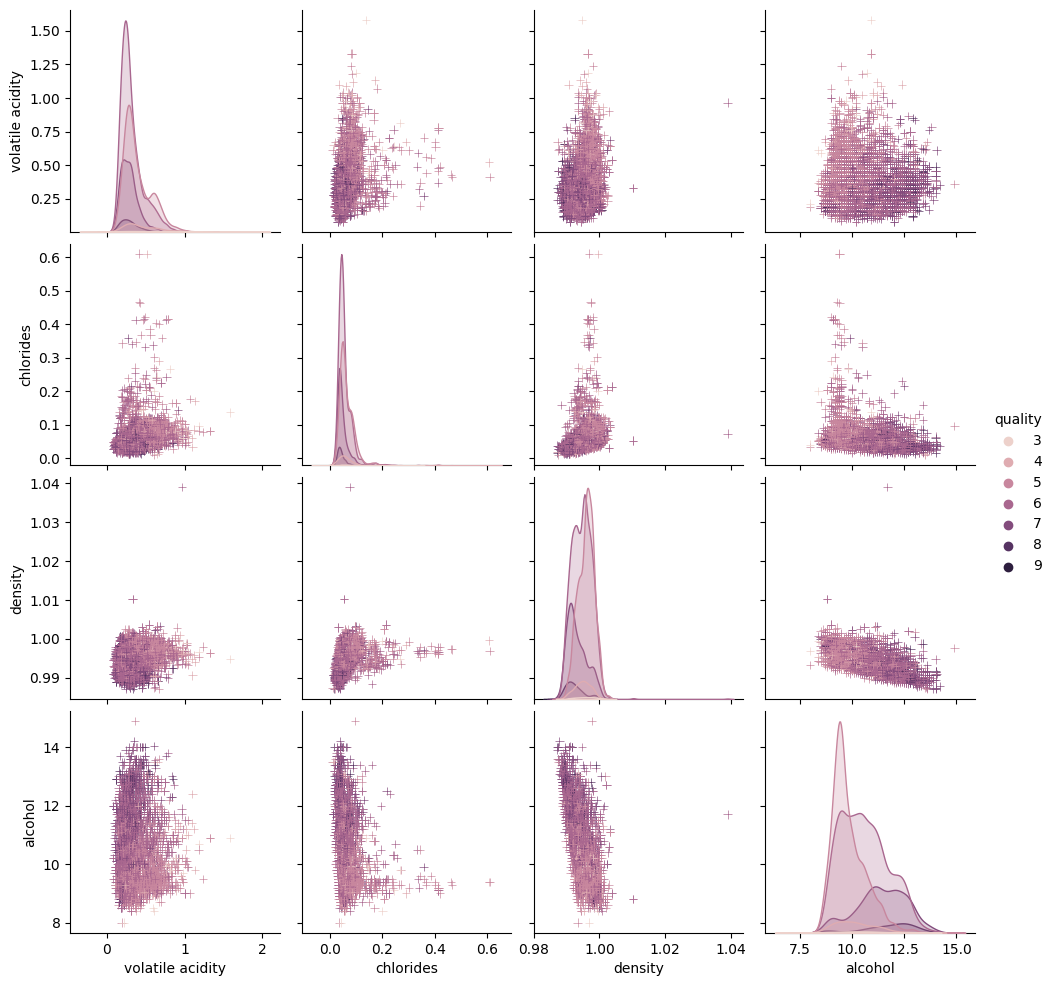

In [14]:
g = sns.pairplot(clean_df, hue='quality', markers='+')
plt.show()

# Visualize range of values

We want to design a simulator generate the different types of wine with quality ranged 3-9. To do this, we can visualize the range of values for the _alcohol_, _chlorides_, _volatile acidity_ and _density_ of wine.

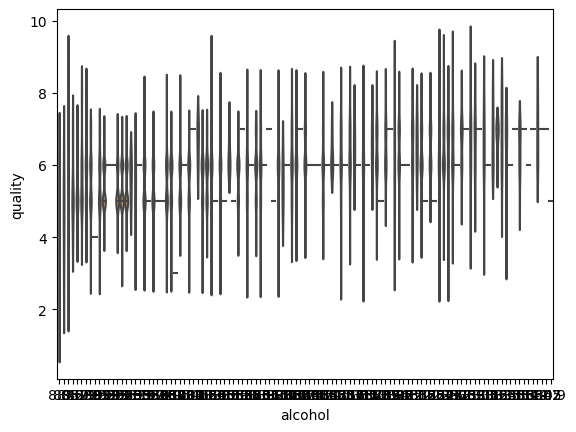

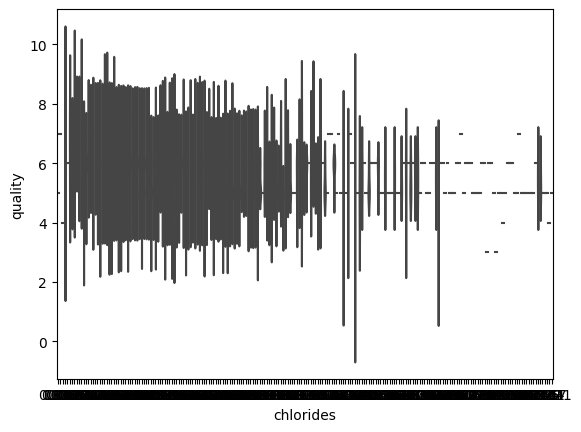

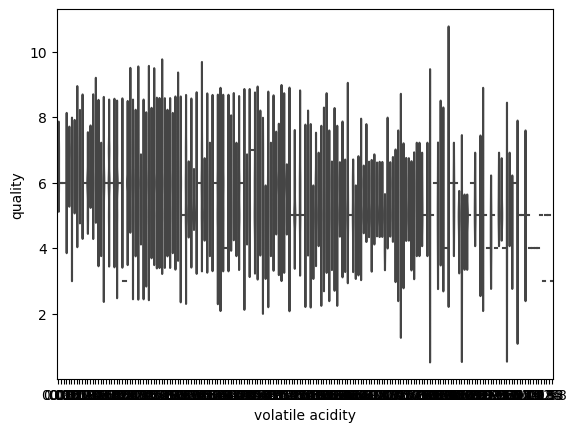

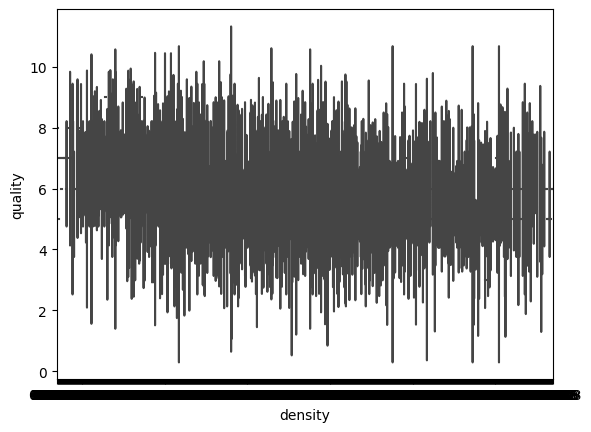

In [15]:
g = sns.violinplot(y='quality', x='alcohol', data=clean_df, inner='quart')
plt.show()
g = sns.violinplot(y='quality', x='chlorides', data=clean_df, inner='quart')
plt.show()
g = sns.violinplot(y='quality', x='volatile acidity', data=clean_df, inner='quart')
plt.show()
g = sns.violinplot(y='quality', x='density', data=clean_df, inner='quart')
plt.show()

# Insert our Iris DataFrame into a FeatureGroup

Let's write our historical iris feature values and labels to a feature group. When you write historical data, this process is called `backfilling`.

In [19]:
clean_df = clean_df.rename(columns={"volatile acidity": "volatile_acidity"})
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["alcohol","chlorides","volatile_acidity","density"],
    description="Wine dataset")
wine_fg.insert(clean_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/189588/fs/189507/fg/223574


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/189588/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7ef8fd9f8640>, None)

# Data Validation

If you want, you can enable data validation for your feature group. The code below will prevent iris flower data from being written to your feature group if you write values outside the expected ranges.

In [ ]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column,
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [ ]:
suite = ExpectationSuite(expectation_suite_name="iris_dimensions")

expect(suite, "sepal_length", 4.5, 8.0)
expect(suite, "sepal_width", 2.1, 4.5)
expect(suite, "petal_length", 1.2, 7)
expect(suite, "petal_width", 0.2, 2.5)
iris_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/189588/fs/189507/fg/200025
